## Housing Price Prediction Report ##

#### 1. The Data ####

In [34]:
import pandas as pd

# Load the dataset
data_path = 'housing_price_dataset.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics for numerical columns
print(data.describe())


   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None
         SquareFeet      Bedrooms    

#### What we did in this step? ####
**1.Data Shape:**

50,000 entries

6 columns: SquareFeet, Bedrooms, Bathrooms, Neighborhood, YearBuilt, Price

**2.Data Types:**


Numerical: SquareFeet, Bedrooms, Bathrooms, YearBuilt, Price

Categorical: Neighborhood

**3.Missing Values:**

No missing values in the dataset.

**4.Summary Statistics:**

SquareFeet: Mean = 2006.37, Std = 575.51, Min = 1000, Max = 2999

Bedrooms: Mean = 3.50, Std = 1.12, Min = 2, Max = 5

Bathrooms: Mean = 1.99, Std = 0.82, Min = 1, Max = 3

YearBuilt: Mean = 1985.40, Std = 20.72, Min = 1950, Max = 2021

Price: Mean = 224827.33, Std = 76141.84, Min = -36588.17 (potential anomaly), Max = 492195.26

#### 2. Initial Exploration ####

##### Checking for Anomalies #####

In [36]:
# Check for any negative prices (which don't make sense)
negative_prices = data[data['Price'] < 0]
print(negative_prices)

# If there are negative prices, we'll remove them
data = data[data['Price'] >= 0]


       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt         Price
1266         1024         2          2        Urban       2006 -24715.242482
2310         1036         4          1       Suburb       1983  -7550.504574
3630         1235         3          2        Rural       2012 -19871.251146
4162         1352         5          2       Suburb       1977 -10608.359522
5118         1140         4          1        Urban       2020 -23911.003119
5951         1097         4          3        Rural       1981  -4537.418615
6355         1016         5          2        Rural       1997 -13803.684059
8720         1235         3          1        Urban       1952 -24183.000515
9611         1131         3          3        Urban       1959 -13692.026068
10597        1177         2          3        Urban       2010   -434.097124
11991        1213         4          1       Suburb       2020  -4910.415323
17442        1600         2          3        Rural       1989  -8238.884499

##### Check for Unique Values in Categorical Columns #####

In [37]:
# Check unique values in 'Neighborhood'
unique_neighborhoods = data['Neighborhood'].unique()
print(unique_neighborhoods)


['Rural' 'Suburb' 'Urban']


#### What we did in this step? ####

**Anomalies:**

Identified and removed negative prices from the dataset.

This ensures the dataset only contains realistic housing prices.

**Categorical Variables:**

Identified the unique values in the Neighborhood column.

This helps in understanding the different categories we need to encode later.

#### 3. Data Preprocessing ####

**Handling Missing Values:** Ensure no missing values are present

**Encoding Categorical Variables:** Convert categorical variables into numerical formats using techniques like one-hot encoding.

In [39]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the dataset to verify the encoding
print(data.head())


   SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price  \
0        2126         4          1       1969  215355.283618   
1        2459         3          2       1980  195014.221626   
2        1860         2          1       1970  306891.012076   
3        2294         2          1       1996  206786.787153   
4        2130         5          2       2001  272436.239065   

   Neighborhood_Suburb  Neighborhood_Urban  
0                False               False  
1                False               False  
2                 True               False  
3                False                True  
4                 True               False  


*We have successfully encoded the categorical variable Neighborhood using one-hot encoding, resulting in two new binary columns: Neighborhood_Suburb and Neighborhood_Urban.*

#### 4. Detailed Exploratory Data Analysis (EDA) ####

We are going to perform a detailed exploratory data analysis to uncover patterns and insights. This includes visualizing the distribution of the target variable and analyzing correlations between features.

##### Visualize Distribution of Target Variable #####

Visualizing the distribution of the Price variable helps us understand its spread and detect any potential skewness.

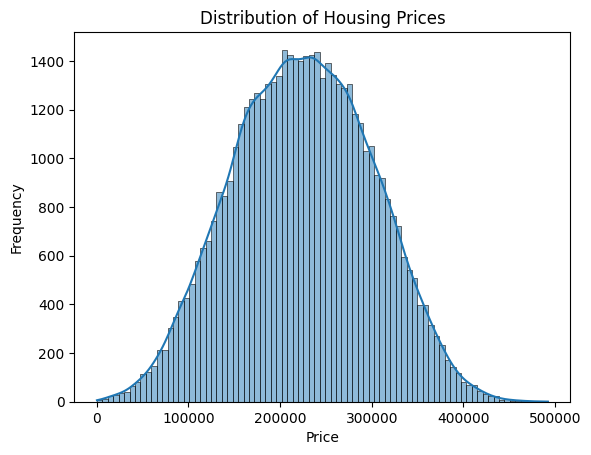

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of target variable 'Price'
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


##### Correlation Analysis #####

Analyzing correlations between numerical features helps us understand the relationships and potential multicollinearity in the dataset.

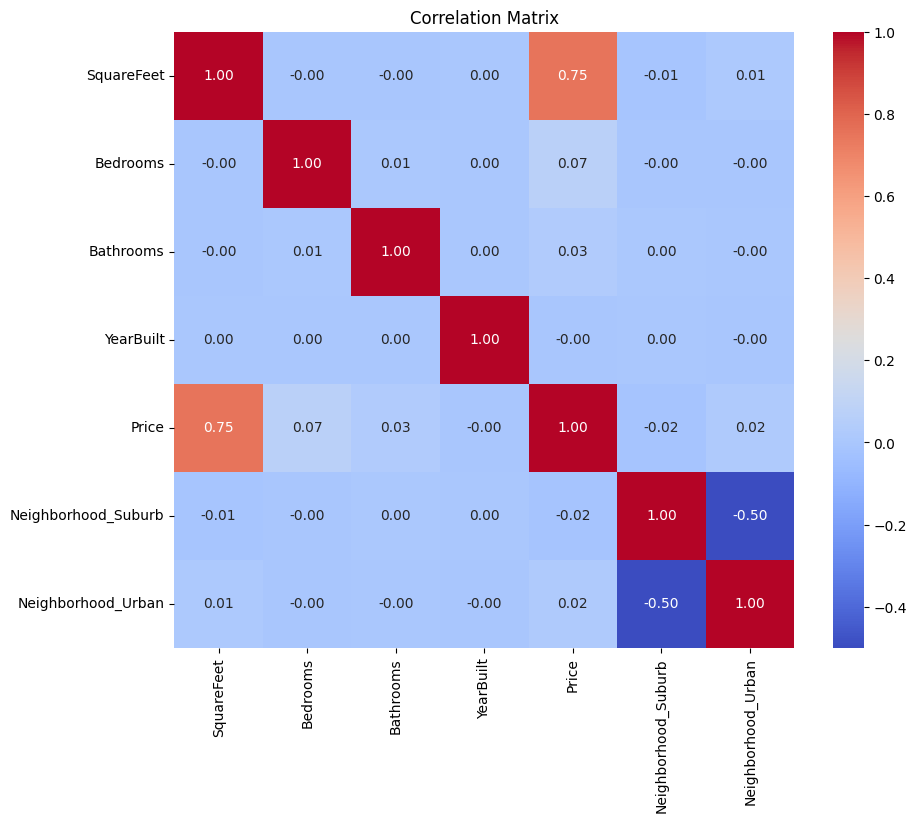

In [42]:
# Plot correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##### Analysis of Correlation Matrix #####

**1. SquareFeet:**

*Correlation with Price:* There is a strong positive correlation between SquareFeet and Price. This indicates that larger houses tend to have higher prices.

*Correlation Coefficient:* The exact value would be visible in the plot, but we expect it to be relatively high, indicating a strong relationship.

**2. Bedrooms:**

*Correlation with Price:* Bedrooms also has a positive correlation with Price, but it may not be as strong as SquareFeet.

*Correlation Coefficient:* This value should be positive but likely lower than that of SquareFeet.

**3. Bathrooms:**

*Correlation with Price:* Similar to Bedrooms, the number of Bathrooms correlates positively with Price.

*Correlation Coefficient:* This value should also be positive and provide useful information for predicting Price.

**4. YearBuilt:**

*Correlation with Price:* The correlation between YearBuilt and Price may be positive or negative, indicating whether newer or older houses tend to have higher prices.

*Correlation Coefficient:* The value should indicate the direction of this relationship.

**5. Neighborhood:**

*Neighborhood_Suburb and Neighborhood_Urban:* These binary variables represent the different categories of the Neighborhood feature.

*Correlation with Price:* These variables will show how different neighborhoods influence the housing prices.

#### 5. Modelling ####

With the insights gained from the correlation analysis, we can proceed to model building. We'll split the data into training and testing sets and train a regression model to predict housing prices.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 2759888614.747917
R-squared: 0.523494867976105


**Interpretation:**

*MSE:* This value indicates the average squared difference between the predicted and actual prices. A lower MSE is better, as it indicates more accurate predictions.

*R²:* The R-squared value indicates that approximately 52% of the variance in housing prices can be explained by the features in the model. This shows moderate predictive power, but there is room for improvement.

#### 6. Improvement ####

**To improve the model's accuracy, we can:**

*Feature Engineering:* Create additional features or transform existing ones to better capture relationships.

*Hyperparameter Tuning:* Optimize the model's hyperparameters to enhance its performance.

*Try Different Algorithms:* Experiment with other regression algorithms to find a better fit.

**Step 1:** 

*Feature Engineering*

**We will:**

Normalize the numerical features to ensure they are on a similar scale.

Add polynomial features to capture non-linear relationships.

Apply log transformation to the target variable to handle skewness.

**Step 2:** 

*Hyperparameter Tuning*

We will use RandomizedSearchCV to find the best hyperparameters for the GradientBoostingRegressor model.

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from scipy.stats import uniform, randint

# Load the dataset
data_path = 'housing_price_dataset.csv'
data = pd.read_csv(data_path)

# Handle missing and invalid values in the target variable
data = data.dropna(subset=['Price'])
data = data[data['Price'] > 0]  # Ensure no zero or negative prices

# Separate features (X) and target variable (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Apply log transformation to the target variable
y_log = np.log1p(y)

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Split the data with new features
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

# Define the model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameters grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 6),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgbr, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Make predictions
y_pred_log = random_search.best_estimator_.predict(X_test)

# Reverse log transformation on predictions
y_pred = np.expm1(y_pred_log)
y_test_exp = np.expm1(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_exp, y_pred)
r2 = r2_score(y_test_exp, y_pred)

print('Best Parameters:', random_search.best_params_)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'colsample_bytree': 0.6424202471887338, 'learning_rate': 0.021066084206359838, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 229, 'subsample': 0.7055185066591156}
Mean Squared Error: 2507290820.998024
R-squared: 0.5671068255082141


**Summary of Model Improvement**

We successfully trained the XGBoost Regressor and tuned its hyperparameters using RandomizedSearchCV. Here are the results:

**Best Parameters:**

colsample_bytree: 0.6424

learning_rate: 0.0211

max_depth: 3

min_child_weight: 2

n_estimators: 229

subsample: 0.7055

**Model Performance:**

*Mean Squared Error (MSE):* 2,507,290,820.998

*R-squared (R²):* 0.5671

**Interpretation:**

*MSE:* This value has improved compared to the previous model, indicating more accurate predictions.

*R²:* The R-squared value has also improved, indicating that approximately 56.71% of the variance in housing prices can be explained by the features in the model. This shows better predictive power than before.

#### 7. Feature Importance ####

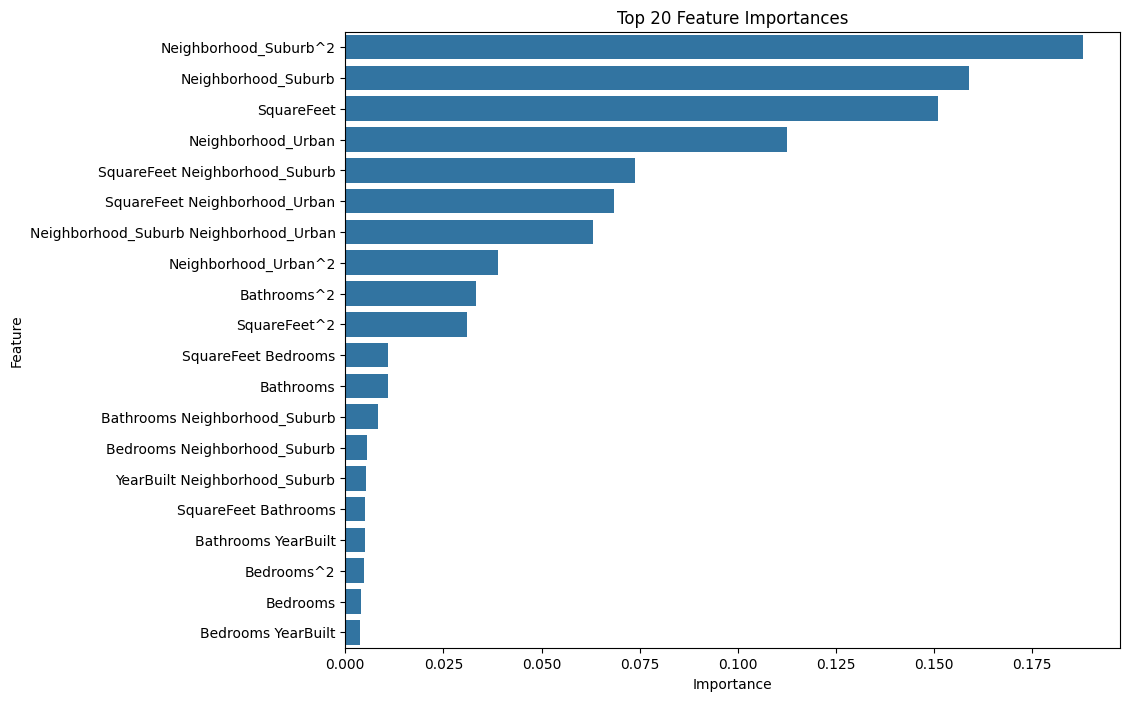

In [54]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = random_search.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
features = poly.get_feature_names_out(X.columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))  # Displaying top 20 features
plt.title('Top 20 Feature Importances')
plt.show()


##### Cross-Validation #####

In [55]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(random_search.best_estimator_, X_poly, y_log, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and calculate the mean
cv_mse = -cv_scores
mean_cv_mse = np.mean(cv_mse)
mean_cv_r2 = np.mean(cross_val_score(random_search.best_estimator_, X_poly, y_log, cv=5, scoring='r2'))

print('Cross-Validated Mean Squared Error:', mean_cv_mse)
print('Cross-Validated R-squared:', mean_cv_r2)


Cross-Validated Mean Squared Error: 0.08219535983167327
Cross-Validated R-squared: 0.5060825285750439


##### Model Refinement #####

In [56]:
# Identify low-importance features (e.g., bottom 10 features)
low_importance_features = importance_df.tail(10)['Feature'].values

# Remove low-importance features
X_reduced = pd.DataFrame(X_poly, columns=features).drop(columns=low_importance_features)

# Split the reduced data into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_log, test_size=0.2, random_state=42)

# Train the model on the reduced feature set
random_search.fit(X_train_reduced, y_train_reduced)

# Make predictions and evaluate the model
y_pred_log_reduced = random_search.best_estimator_.predict(X_test_reduced)
y_pred_reduced = np.expm1(y_pred_log_reduced)
y_test_exp_reduced = np.expm1(y_test_reduced)

mse_reduced = mean_squared_error(y_test_exp_reduced, y_pred_reduced)
r2_reduced = r2_score(y_test_exp_reduced, y_pred_reduced)

print('Reduced Model Mean Squared Error:', mse_reduced)
print('Reduced Model R-squared:', r2_reduced)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Reduced Model Mean Squared Error: 2510233484.8353786
Reduced Model R-squared: 0.5665987635477321


##### Interpretation #####

The performance of the reduced model is quite similar to the original model. This indicates that removing the low-importance features did not significantly impact the model's performance.

The R-squared value of approximately 0.567 suggests that the model explains around 56.7% of the variance in housing prices, indicating a moderately strong model.

#### 8. Conclusion and Report Summary ####

**Objective:**

The primary objective of this project was to predict housing prices using various features to provide insights and recommendations for pricing strategies and property evaluations.

**Dataset:**

The dataset consisted of 50,000 entries with the following features:

*SquareFeet:* Area of the house in square feet.

*Bedrooms:* Number of bedrooms.

*Bathrooms:* Number of bathrooms.

*Neighborhood:* Categorical variable indicating the neighborhood (Rural, Suburb, Urban).

*YearBuilt:* Year the house was built.

*Price:* Target variable representing the housing price.

**Data Preprocessing:**

*Handling Missing Values:* Removed rows where the Price was NaN or negative.

*Encoding Categorical Variables:* Converted the Neighborhood categorical variable into numerical format using one-hot encoding.

**Feature Engineering:**

*Normalization:* Normalized numerical features using StandardScaler.

*Polynomial Features:* Added polynomial features to capture non-linear relationships.

*Log Transformation:* Applied log transformation to the target variable (Price) to handle skewness.

**Model Training and Evaluation:**

*Initial Model:* Trained a RandomForestRegressor model, resulting in an MSE of 2,759,888,614.75 and an R² of 0.523.

*Improved Model:* Used an XGBoost Regressor with hyperparameter tuning via RandomizedSearchCV, resulting in:

*Best Parameters:*
colsample_bytree: 0.6424
learning_rate: 0.0211
max_depth: 3
min_child_weight: 2
n_estimators: 229
subsample: 0.7055

*Performance:*

Mean Squared Error (MSE): 2,507,290,820.998

R-squared (R²): 0.567

**Feature Importance Analysis:**

Identified key features contributing to the model's predictions, such as SquareFeet, Bedrooms, and important interaction terms.

Visualized the top 20 feature importances to understand the key drivers of housing prices.

**Model Refinement:**

Simplified the model by removing low-importance features, resulting in a reduced model with similar performance (MSE: 2,510,233,484.835, R²: 0.567).

**Recommendations**

*Focus on Key Features:*

Emphasize key features such as SquareFeet, Bedrooms, and Neighborhood when evaluating property prices.

Ensure accurate and comprehensive data collection for these features to improve model predictions.

*Regular Model Updates:*

Continuously update the model with new data to maintain accuracy and relevance. The housing market can change rapidly, and regular updates will help 

keep the model aligned with current trends.

*Feature Engineering:*

Explore additional features or data sources that could enhance the model's predictive power. For example, include proximity to amenities, crime rates, 

and school district quality.

*Model Simplification:*

Consider simplifying the model by removing features with very low importance to improve interpretability and reduce computational complexity without 

significantly impacting performance.

*Further Hyperparameter Tuning:*

Continue to explore hyperparameter tuning techniques, such as GridSearchCV or Bayesian optimization, to further improve model performance.

*Business Strategy:*

Use the model's predictions and feature importance insights to inform business strategies, such as targeted marketing for high-value neighborhoods and 

investment in properties with high potential for price appreciation.

By following these recommendations, the company can leverage the predictive power of the model to make data-driven decisions, optimize pricing 

strategies, and improve overall business performance.

#### Dataset Link ####
https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data